In [ ]:
import pandas as pd
df = pd.read_csv('Book1.csv',parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
df2 = df.copy()
for long in ['pickup_longitude', 'dropoff_longitude']:
  df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]


In [ ]:
landmarks = {'JFK Airport': (-73.78, 40.643),
 'Laguardia Airport': (-73.87, 40.77),
 'Midtown': (-73.98, 40.76),
 'Lower Manhattan': (-74.00, 40.72),
 'Upper Manhattan': (-73.94, 40.82),
 'Brooklyn': (-73.95, 40.66)}

In [ ]:
import matplotlib.pyplot as plt
def plot_lat_long(df, landmarks, points='Pickup'):
  plt.figure(figsize = (12,12)) # set figure size
  if points == 'pickup':
    plt.plot(list(df.pickup_longitude), list(df.pickup_latitude),'.', markersize=1)
  else:
    plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)
  for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1],'*', markersize=15, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0]+0.005,landmarks[landmark][1]+0.005), color='r',backgroundcolor='w')
  plt.title("{} Locations in NYC Illustrated".format(points))
  plt.grid(None)
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")
  plt.show()


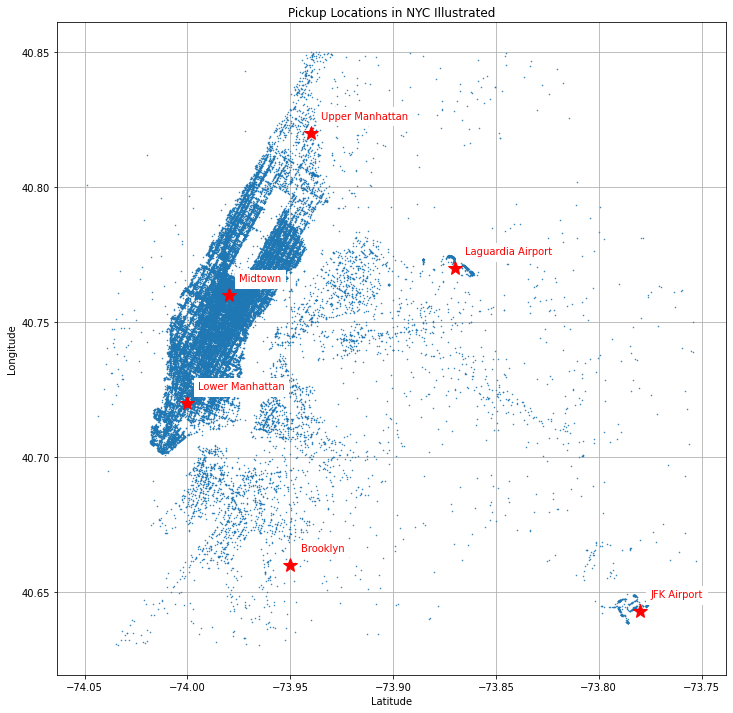

In [ ]:
plot_lat_long(df2, landmarks, points='Pickup')

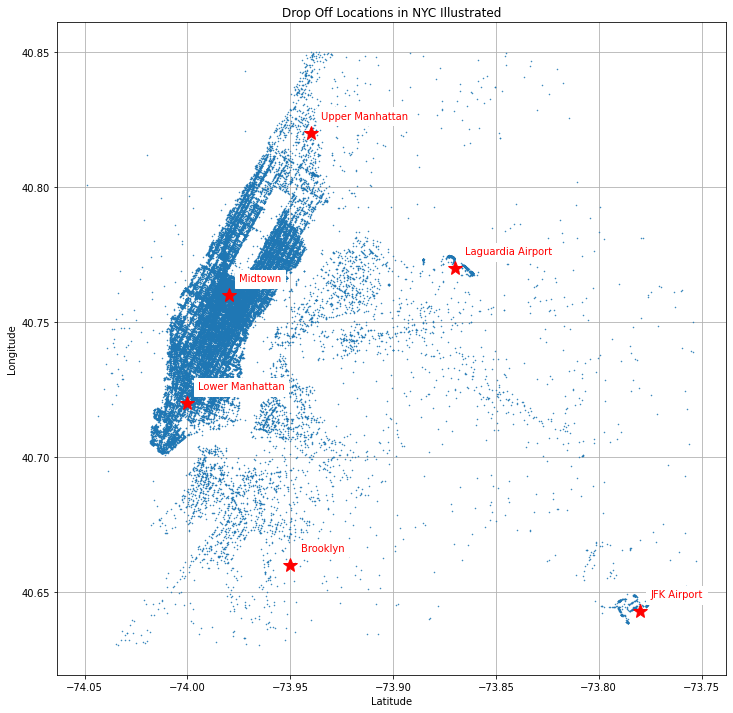

In [ ]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour


In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


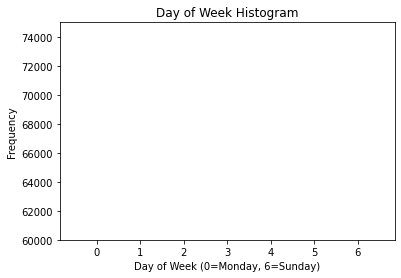

In [ ]:
import numpy as np
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black',
 ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()


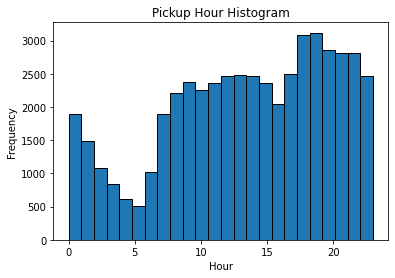

In [ ]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()


In [ ]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
pd.set_option("display.max_columns", None)
print(df.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  43193.000000      43193.000000     43193.000000       43193.000000   
mean      12.445471        -72.547408        39.943221         -72.562063   
std        9.636718         10.277054         5.997670          10.221672   
min        5.000000        -75.423848       -74.006893         -84.654241   
25%        6.900000        -73.992330        40.734125         -73.991212   
50%        9.300000        -73.981959        40.752264         -73.980072   
75%       13.700000        -73.967297        40.766901         -73.963308   
max      100.000000         40.783472        43.098708          40.851027   

       dropoff_latitude  passenger_count          year         month  \
count      43193.000000     43193.000000  43193.000000  43193.000000   
mean          39.955992         1.673396   2011.838909      6.293497   
std            5.958093         1.293690      1.864824      3.456830   
min          -74.0

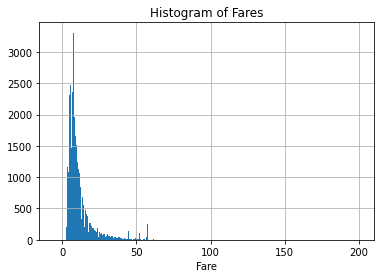

In [ ]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()


In [ ]:
df = df[(df['fare_amount'] >=2) & (df['fare_amount'] <= 100)]

In [ ]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1

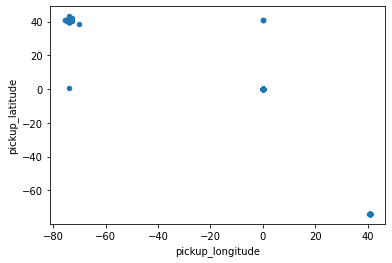

In [ ]:
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()


In [ ]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
# only consider locations within NYC
for long in ['pickup_longitude', 'dropoff_longitude']:
 df = df[(df[long] > nyc_min_longitude) & (df[long] <
 nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
 df = df[(df[lat] > nyc_min_latitude) & (df[lat] <
 nyc_max_latitude)]

In [ ]:
print(df.loc[:5,['pickup_datetime', 'year', 'month',
 'day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [ ]:
df = df.drop(['pickup_datetime'], axis=1)

In [ ]:
def euc_distance(lat1, long1, lat2, long2):
 return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

In [ ]:
df['distance'] = euc_distance(df['pickup_latitude'],
 df['pickup_longitude'],
 df['dropoff_latitude'],
 df['dropoff_longitude'])

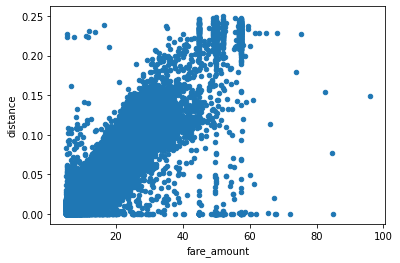

In [ ]:
df.plot.scatter('fare_amount', 'distance')
plt.show()


In [ ]:
airports = {'JFK_Airport': (-73.78,40.643),
 'Laguardia_Airport': (-73.87, 40.77),
 'Newark_Airport' : (-74.18, 40.69)}
for airport in airports:
 df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'],
 df['pickup_longitude'],
 airports[airport][1],
 airports[airport][0])
 df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'],
 df['dropoff_longitude'],
 airports[airport][1],
 airports[airport][0])

In [ ]:
print(df[['key', 'pickup_longitude', 'pickup_latitude',
 'dropoff_longitude', 'dropoff_latitude',
 'pickup_dist_JFK_Airport',
 'dropoff_dist_JFK_Airport']].head())

       key  pickup_longitude  pickup_latitude  dropoff_longitude  \
1  52:16.0        -74.016048        40.711303         -73.979268   
2  35:00.0        -73.982738        40.761270         -73.991242   
3  30:42.0        -73.987130        40.733143         -73.991567   
4  51:00.0        -73.968095        40.768008         -73.956655   
5  50:45.0        -74.000964        40.731630         -73.972892   

   dropoff_latitude  pickup_dist_JFK_Airport  dropoff_dist_JFK_Airport  
1         40.782004                 0.245731                  0.242961  
2         40.750562                 0.234714                  0.237050  
3         40.758092                 0.225895                  0.240846  
4         40.783762                 0.225847                  0.225878  
5         40.758233                 0.238076                  0.224691  


In [ ]:
df = df.drop(['key'], axis=1)

In [ ]:
df_prescaled = df.copy()

In [ ]:
df_scaled = df.drop(['fare_amount'], axis=1)

In [ ]:
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)


In [ ]:
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis=1)
df = df_scaled.copy()

In [ ]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=20)


Epoch 1/20
1044/1044 [==============================] - 3s 2ms/step - loss: 14.1709 - mse: 14.1709
Epoch 2/20
1044/1044 [==============================] - 2s 2ms/step - loss: 13.8129 - mse: 13.8129
Epoch 3/20
1044/1044 [==============================] - 2s 2ms/step - loss: 13.4404 - mse: 13.4404
Epoch 4/20
1044/1044 [==============================] - 2s 2ms/step - loss: 13.1723 - mse: 13.1723
Epoch 5/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.9978 - mse: 12.9978
Epoch 6/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.8047 - mse: 12.8047
Epoch 7/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.5789 - mse: 12.5789
Epoch 8/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.4639 - mse: 12.4639
Epoch 9/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.3574 - mse: 12.3574
Epoch 10/20
1044/1044 [==============================] - 2s 2ms/step - loss: 12.1456 - mse: 12.1456
Epoch 11/

In [ ]:
def predict_random(df_prescaled, X_test, model):
 sample = X_test.sample(n=1, random_state=np.random.randint(low=0,
 high=10000))
 idx = sample.index[0]

 actual_fare = df_prescaled.loc[idx,'fare_amount']
 day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
 'Saturday', 'Sunday']
 day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
 hour = df_prescaled.loc[idx,'hour']
 predicted_fare = model.predict(sample)[0][0]
 rmse = np.sqrt(np.square(predicted_fare-actual_fare))
 print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))
 print("Actual fare: ${:0.2f}".format(actual_fare))
 print("Predicted fare: ${:0.2f}".format(predicted_fare))
 print("RMSE: ${:0.2f}".format(rmse))

In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Wednesday, 14:00hrs
Actual fare: $9.70
Predicted fare: $10.33
RMSE: $0.63


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Wednesday, 8:00hrs
Actual fare: $5.70
Predicted fare: $5.77
RMSE: $0.07


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Sunday, 1:00hrs
Actual fare: $15.50
Predicted fare: $18.20
RMSE: $2.70


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Saturday, 20:00hrs
Actual fare: $13.30
Predicted fare: $11.96
RMSE: $1.34


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Sunday, 0:00hrs
Actual fare: $8.10
Predicted fare: $7.88
RMSE: $0.22


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Sunday, 23:00hrs
Actual fare: $5.30
Predicted fare: $5.63
RMSE: $0.33


In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Saturday, 13:00hrs
Actual fare: $8.00
Predicted fare: $8.06
RMSE: $0.06


In [ ]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))


Train RMSE: 3.26
Test RMSE: 3.48
